In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
from enum import Enum

import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy as sp

In [481]:
data.head(5)

,PType,Age,Gender,Education,Answer
0,ÇDÜY,1,1,3,"[SCORETYPE.SEZGISEL, SCORETYPE.DISADONUK, SCOR..."
1,ÇDÜY,1,0,2,"[SCORETYPE.DUYUSAL, SCORETYPE.ICEDONUK, SCORET..."
2,ŞDÜY,1,0,2,"[SCORETYPE.SEZGISEL, SCORETYPE.ICEDONUK, SCORE..."
3,ŞSÜY,1,1,2,"[SCORETYPE.SEZGISEL, SCORETYPE.DISADONUK, SCOR..."
4,ÇSUY,2,1,3,"[SCORETYPE.SEZGISEL, SCORETYPE.DISADONUK, SCOR..."


<h1> ENUMS TO CODE DATA </h1>

In [2]:
# ENUMS:
class AgeRange(Enum):
    MINUS18 = 0
    B2130 = 1
    B3140 = 2
    B4150 = 3
    PLUS50 = 4

class Education(Enum):
    HSCHOOL = 0
    JCOLLEGE = 1
    UNIVERSITY = 2
    MASTERS = 3
    PHD = 4
    OTHER = 5
    
class Gender(Enum):
    MALE = 0
    FEMALE = 1

class SCORETYPE(Enum):
    ICEDONUK = 0
    DISADONUK = 1
    DUYUSAL = 2
    SEZGISEL = 3
    DUSUNSEL = 4
    DUYGUSAL = 5
    YARGISAL = 6
    ALGISAL = 7

<h1> CLEAN DATA </h1>

In [3]:
data = pd.read_csv("kpa-data.csv", sep=";", names = ["PType", "Age", "Gender", "Education", "Answer"]);

# Remove First 3 rows
for dataIndex in range(3):
    data = data.drop([dataIndex])
data = data.reset_index(drop = True)

dataRowCount = data.shape[0]

#Remove commas from answer column
for row in range(dataRowCount):
    data["Answer"][row] = data["Answer"][row].replace(",", "")

# Convert String Labels to Enums
for row in range(dataRowCount):
    if data["Age"][row] == "21-30":
        data["Age"][row] = AgeRange.B2130.value
    elif data["Age"][row] == "31-40":
        data["Age"][row] = AgeRange.B3140.value
    elif data["Age"][row] == "41-50":
        data["Age"][row] = AgeRange.B4150.value
    elif data["Age"][row] == "20 ve altı":
        data["Age"][row] = AgeRange.MINUS18.value
    elif data["Age"][row] == "50 ve yukarısı":
        data["Age"][row] = AgeRange.PLUS50.value

for row in range(dataRowCount):
    if data["Education"][row] == "Lise":
        data["Education"][row] = Education.HSCHOOL.value
    elif data["Education"][row] == "Yüksek Okul (2 yıl)":
        data["Education"][row] = Education.JCOLLEGE.value
    elif data["Education"][row] == "Üniversite":
        data["Education"][row] = Education.UNIVERSITY.value
    elif data["Education"][row] == "Yüksek Lisans":
        data["Education"][row] = Education.MASTERS.value
    elif data["Education"][row] == "Doktora":
        data["Education"][row] = Education.PHD.value
    elif data["Education"][row] == "Lise öncesi":
        data["Education"][row] = Education.OTHER.value
        
for row in range(dataRowCount):
    if data["Gender"][row] == "Erkek":
        data["Gender"][row] = Gender.MALE.value
    elif data["Gender"][row] == "Kadın":
        data["Gender"][row] = Gender.FEMALE.value

In [9]:
dataRowCount = data.shape[0]
newAnswerTotal = []
for row in range(dataRowCount):
    newAnswer = []
    for choice in range(len(data["Answer"][0])):
        if data["Answer"][row][choice] == "a":
            newAnswer.append(answerSheet[choice + 1][0])
        else:
            newAnswer.append(answerSheet[choice + 1][1])
    newAnswerTotal.append(newAnswer)

for row in range(dataRowCount):
    data["Answer"][row] = newAnswerTotal[row]

<h1> CALCULATE CORRELATION AND PLOT IT </h1>

In [856]:
dataRowCount = data.shape[0]
correlations = []
for questionNumber in range(32):
    firstScoreType = answerSheet[questionNumber + 1][0]
    secondScoreType = answerSheet[questionNumber + 1][1]
    correlations.append(findCorrelationBetweenQuestionAndScore(questionNumber, firstScoreType, secondScoreType)[0])


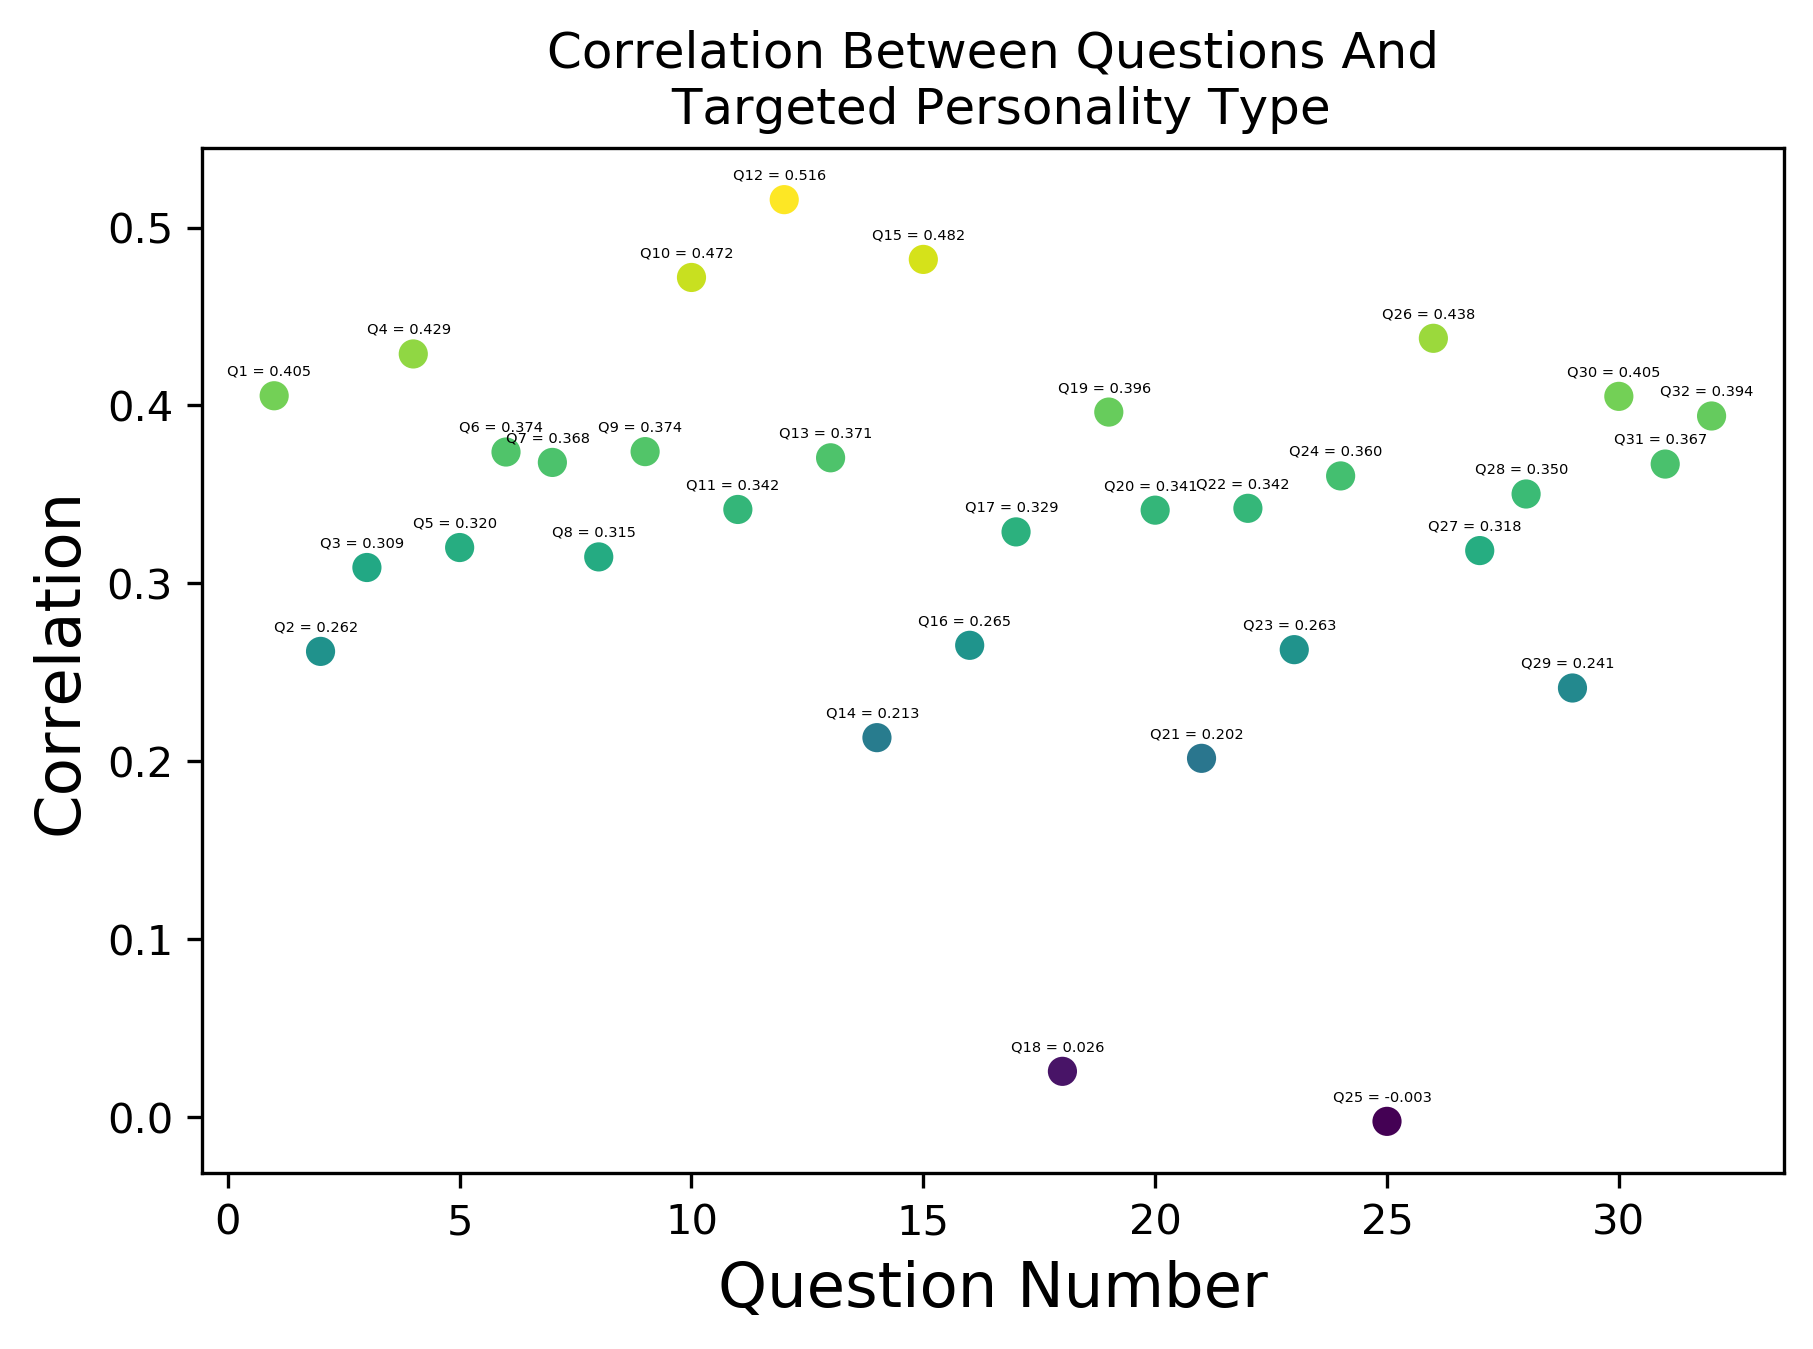

In [857]:
fig, ax = plt.subplots()
fig.facecolor = "w"
fig.edgecolr = "k"
fig.dpi = 300
fig.figsize = figsize=(8, 6)
fig.tight_layout()
ax.set_xlabel("Question Number", fontsize=15)
ax.set_ylabel('Correlation', fontsize=15)

ax.set_title('Correlation Between Questions And\n Targeted Personality Type')

scatterColor = correlations
plt.scatter(range(1,33), correlations, c = scatterColor)
for questionNumber in range(32):
    correlation2Digit = "{0:.3f}".format(correlations[questionNumber])
    plt.annotate(f"Q{questionNumber + 1} = {correlation2Digit}",(questionNumber,correlations[questionNumber]), textcoords="offset points",xytext=(10,5), ha='center', fontsize = 3.5) 
    # plt.text(questionNumber, correlations[questionNumber], f"Q{questionNumber} = {correlation2Digit}")



plt.show()
fig.savefig('Correlation Between Questions And\n Targeted Personality Type.png', bbox_inches='tight')

<h1>Logistic Regression</h1>

In [1036]:
predicted

[1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1]

In [1030]:
_, predicted = getPredictorsAndPredictedForSpecificType(SCORETYPE.ICEDONUK)
predictors = getPredictorsForGender()

predictors = sm.add_constant(predictors)
logit_model=sm.Logit(predicted,predictors)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.644685
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  162
Model:                          Logit   Df Residuals:                      160
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:                 0.02195
Time:                        10:44:37   Log-Likelihood:                -104.44
converged:                       True   LL-Null:                       -106.78
Covariance Type:            nonrobust   LLR p-value:                   0.03039
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9076      0.247      3.674      0.000       0.423       1.392
x1            -0.7118      0.

<h3>FOR ICEDONUK</h3>

In [994]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

_, predicted = getPredictorsAndPredictedForSpecificType(SCORETYPE.ICEDONUK)
predictors, _ = getPredictorsAndPredictedForSpecificType(SCORETYPE.SEZGISEL)

predictors = np.asarray(predictors).transpose()
predicted = np.asarray(predicted)

# X_train,X_test,y_train,y_test = train_test_split(predictors,predicted,test_size=0.2,random_state=0)
# clf = LogisticRegression(random_state=0, solver ="lbfgs").fit(X_train, y_train)
# print(clf.score(X_test, y_test)) # gives mean accuracy

predictors = sm.add_constant(predictors)
logit_model=sm.Logit(predicted,predictors)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.585445
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  162
Model:                          Logit   Df Residuals:                      153
Method:                           MLE   Df Model:                            8
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:                  0.1118
Time:                        10:03:47   Log-Likelihood:                -94.842
converged:                       True   LL-Null:                       -106.78
Covariance Type:            nonrobust   LLR p-value:                  0.002399
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1821      0.662      1.786      0.074      -0.115       2.479
x1            -0.5456      0.

<h3>HIGH CORRELATIONS BETWEEN:</h3>
<h4>Q28 and Q30, Q5 and Q12 - remove them? </h4>

In [869]:
answers = {SCORETYPE.ICEDONUK : [],
          SCORETYPE.DUYUSAL : [],
          SCORETYPE.DUSUNSEL : [],
          SCORETYPE.YARGISAL : []}
questionTypes = [SCORETYPE.DUYUSAL, SCORETYPE.DUSUNSEL, SCORETYPE.ICEDONUK, SCORETYPE.YARGISAL]

for scoreType in questionTypes:
    predictors, predicted = getPredictorsAndPredictedForSpecificType(scoreType)
    predictors = np.asarray(predictors)
    predicted = np.asarray(predicted)

    for questionNumber in range(8):
        for otherQuestionNumber in range(8):
            if questionNumber == otherQuestionNumber:
                continue
            corr = sp.stats.pearsonr(predictors[questionNumber], predictors[otherQuestionNumber])
            if corr[1] < 0.01/84 and ([questionNumber + 1, otherQuestionNumber + 1] in answers[scoreType]) == False and ([otherQuestionNumber + 1,questionNumber + 1] in answers[scoreType]) == False:
                answers[scoreType].append([questionNumber + 1, otherQuestionNumber + 1])
                answers[scoreType].append([corr[0], corr[1]])
print(answers)

{<SCORETYPE.ICEDONUK: 0>: [], <SCORETYPE.DUYUSAL: 2>: [[7, 8], [0.3589231260641609, 2.729237491955704e-06]], <SCORETYPE.DUSUNSEL: 4>: [[2, 3], [0.35346600922162486, 3.952301928489306e-06]], <SCORETYPE.YARGISAL: 6>: []}


In [870]:
def getPredictorsAndPredictedForSpecificType(questionType):
    predictors = []
    predicted = []
    for questionNumber in range(32):
        firstScoreType = answerSheet[questionNumber + 1][0]
        secondScoreType = answerSheet[questionNumber + 1][1]
        if (firstScoreType == questionType) or (secondScoreType == questionType):
            predictors.append(findPredictors(questionNumber,firstScoreType, secondScoreType))
    predicted = findPredictedByScoreType(questionType)
    return (predictors, predicted)

In [1019]:
def getPredictorsForGender():
    predictors = []
    for row in range(data.shape[0]):
        if data["Gender"][row] == 0:
            predictors.append(0)
        else:
            predictors.append(1)
    return predictors

In [865]:
def findCorrelationBetweenQuestionAndScore(questionNumber, firstScoreType, secondScoreType):
    dataRowCount = data.shape[0]
    predictors = []
    predicted = []

    predictors = findPredictors(questionNumber, firstScoreType, secondScoreType)
    predicted = findPredictedByScoreType(firstScoreType)
    return sp.stats.pearsonr(predictors, predicted)

In [867]:
def findPredictors(questionNumber, firstScoreType, secondScoreType):
    dataRowCount = data.shape[0]
    predictors = []
    
    for rowNumber in range(dataRowCount):
        if data["Answer"][rowNumber][questionNumber] == firstScoreType:        
            predictors.append(1)
        elif data["Answer"][rowNumber][questionNumber] == secondScoreType:
            predictors.append(0)

    return predictors

In [868]:
def findPredictedByScoreType(firstScoreType):
    dataRowCount = data.shape[0]
    predicted = []
    secondScoreType = None
    
    if firstScoreType == SCORETYPE.ICEDONUK:
        secondScoreType = SCORETYPE.DISADONUK
    elif firstScoreType == SCORETYPE.DISADONUK:
        secondScoreType = SCORETYPE.ICEDONUK
    elif firstScoreType == SCORETYPE.DUYUSAL:
        secondScoreType = SCORETYPE.SEZGISEL
    elif firstScoreType == SCORETYPE.SEZGISEL:
        secondScoreType = SCORETYPE.DUYUSAL
    elif firstScoreType == SCORETYPE.DUSUNSEL:
        secondScoreType = SCORETYPE.DUYGUSAL
    elif firstScoreType == SCORETYPE.DUYGUSAL:
        secondScoreType = SCORETYPE.DUSUNSEL
    elif firstScoreType == SCORETYPE.YARGISAL:
        secondScoreType = SCORETYPE.ALGISAL
    elif firstScoreType == SCORETYPE.ALGISAL:
        secondScoreType = SCORETYPE.YARGISAL
    
    firstScoreLetter = getScoreLetter(firstScoreType)
    secondScoreLetter = getScoreLetter(secondScoreType)
    
    for rowNumber in range(dataRowCount):
        if firstScoreLetter in data["PType"][rowNumber]:        
            predicted.append(1)
        elif secondScoreLetter in data["PType"][rowNumber]:
            predicted.append(0)
    return predicted

In [7]:
#Function return Personality type by subject's row number
def getPersonalityType(rowNumber):
    iceDonukCounter = 0
    duyusalCounter = 0
    dusunselCounter = 0
    yargisalCounter = 0
    disaDonukCounter = 0
    sezgiselCounter = 0
    duygusalCounter = 0
    algisalCounter = 0

    for choice in range(len(data["Answer"][rowNumber])):
        if data["Answer"][rowNumber][choice] == SCORETYPE.ICEDONUK:
            iceDonukCounter += 1
        elif data["Answer"][rowNumber][choice] == SCORETYPE.DISADONUK:
            disaDonukCounter += 1
        elif data["Answer"][rowNumber][choice] == SCORETYPE.DUYUSAL:
            duyusalCounter += 1
        elif data["Answer"][rowNumber][choice] == SCORETYPE.SEZGISEL:
            sezgiselCounter += 1
        elif data["Answer"][rowNumber][choice] == SCORETYPE.DUSUNSEL:
            dusunselCounter += 1
        elif data["Answer"][rowNumber][choice] == SCORETYPE.DUYGUSAL:
            duygusalCounter += 1
        elif data["Answer"][rowNumber][choice] == SCORETYPE.YARGISAL:
            yargisalCounter += 1
        elif data["Answer"][rowNumber][choice] == SCORETYPE.ALGISAL:
            algisalCounter += 1

    personalityType = ""

    if iceDonukCounter > disaDonukCounter:
        personalityType += "Ç"
    else:
        personalityType += "Ş"

    if sezgiselCounter > duyusalCounter:
        personalityType += "S"
    else:
        personalityType += "D"

    if  duygusalCounter > dusunselCounter:
        personalityType += "U"
    else:
        personalityType += "Ü"

    if algisalCounter > yargisalCounter:
        personalityType += "A"
    else:
        personalityType += "Y"
    
    return personalityType

In [8]:
answerSheet = {
    1 : [ SCORETYPE.SEZGISEL, SCORETYPE.DUYUSAL],
    2 : [ SCORETYPE.ICEDONUK, SCORETYPE.DISADONUK],
    3 : [ SCORETYPE.DUSUNSEL, SCORETYPE.DUYGUSAL],
    4 : [ SCORETYPE.YARGISAL, SCORETYPE.ALGISAL],
    5 : [ SCORETYPE.DUSUNSEL, SCORETYPE.DUYGUSAL],
    6 : [ SCORETYPE.ICEDONUK, SCORETYPE.DISADONUK],
    7 : [ SCORETYPE.YARGISAL, SCORETYPE.ALGISAL],
    8 : [ SCORETYPE.ALGISAL, SCORETYPE.YARGISAL],
    9 : [ SCORETYPE.YARGISAL, SCORETYPE.ALGISAL],
    10 : [ SCORETYPE.SEZGISEL, SCORETYPE.DUYUSAL],
    11 : [ SCORETYPE.ICEDONUK, SCORETYPE.DISADONUK],
    12 : [ SCORETYPE.DUSUNSEL, SCORETYPE.DUYGUSAL],
    13 : [ SCORETYPE.DUYUSAL, SCORETYPE.SEZGISEL],
    14 : [ SCORETYPE.DUYGUSAL, SCORETYPE.DUSUNSEL],
    15 : [ SCORETYPE.DISADONUK, SCORETYPE.ICEDONUK],
    16 : [ SCORETYPE.DUYUSAL, SCORETYPE.SEZGISEL],
    17 : [ SCORETYPE.DUYUSAL, SCORETYPE.SEZGISEL],
    18 : [ SCORETYPE.ALGISAL, SCORETYPE.YARGISAL],
    19 : [ SCORETYPE.DISADONUK, SCORETYPE.ICEDONUK],
    20 : [ SCORETYPE.DUSUNSEL, SCORETYPE.DUYGUSAL],
    21 : [ SCORETYPE.DUYUSAL, SCORETYPE.SEZGISEL],
    22 : [ SCORETYPE.ICEDONUK, SCORETYPE.DISADONUK],
    23 : [ SCORETYPE.ALGISAL, SCORETYPE.YARGISAL],
    24 : [ SCORETYPE.DUYGUSAL, SCORETYPE.DUSUNSEL],
    25 : [ SCORETYPE.DUSUNSEL, SCORETYPE.DUYGUSAL],
    26 : [ SCORETYPE.YARGISAL, SCORETYPE.ALGISAL],
    27 : [ SCORETYPE.DISADONUK, SCORETYPE.ICEDONUK],
    28 : [ SCORETYPE.SEZGISEL, SCORETYPE.DUYUSAL],
    29 : [ SCORETYPE.DUYGUSAL, SCORETYPE.DUSUNSEL],
    30 : [ SCORETYPE.SEZGISEL, SCORETYPE.DUYUSAL],
    31 : [ SCORETYPE.YARGISAL, SCORETYPE.ALGISAL],
    32 : [ SCORETYPE.DISADONUK, SCORETYPE.ICEDONUK]
}

In [102]:
def getScoreLetter(retrievedScoreType):
    scoreLetter = ""    
    if retrievedScoreType == SCORETYPE.ICEDONUK:
        scoreLetter = "Ç"
    elif retrievedScoreType == SCORETYPE.DISADONUK:
        scoreLetter = "Ş"
    elif retrievedScoreType == SCORETYPE.DUYUSAL:
        scoreLetter = "D"
    elif retrievedScoreType == SCORETYPE.SEZGISEL:
        scoreLetter = "S"
    elif retrievedScoreType == SCORETYPE.DUSUNSEL:
        scoreLetter = "Ü"
    elif retrievedScoreType == SCORETYPE.DUYGUSAL:
        scoreLetter = "U"
    elif retrievedScoreType == SCORETYPE.YARGISAL:
        scoreLetter = "Y"
    elif retrievedScoreType == SCORETYPE.ALGISAL:
        scoreLetter = "A"
    return scoreLetter